<a href="https://colab.research.google.com/github/bhargavpetla/programms/blob/main/giftwrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Points on hull: [Point(x=-100, y=15), Point(x=-97, y=-72), Point(x=-71, y=-99), Point(x=65, y=-91), Point(x=87, y=-58), Point(x=94, y=5), Point(x=77, y=65), Point(x=62, y=92), Point(x=37, y=91), Point(x=-65, y=82), Point(x=-86, y=61), Point(x=-99, y=32), Point(x=-100, y=15)]


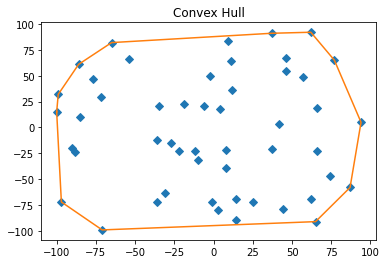

In [2]:
from collections import namedtuple  
import matplotlib.pyplot as plt  
import random

Point = namedtuple('Point', 'x y')


class ConvexHull(object):  
    _points = []
    _hull_points = []

    def __init__(self):
        pass

    def add(self, point):
        self._points.append(point)

    def _get_orientation(self, origin, p1, p2):
        '''
        Returns the orientation of the Point p1 with regards to Point p2 using origin.
        Negative if p1 is clockwise of p2.
        :param p1:
        :param p2:
        :return: integer
        '''
        difference = (
            ((p2.x - origin.x) * (p1.y - origin.y))
            - ((p1.x - origin.x) * (p2.y - origin.y))
        )

        return difference

    def compute_hull(self):
        '''
        Computes the points that make up the convex hull.
        :return:
        '''
        points = self._points

        # get leftmost point
        start = points[0]
        min_x = start.x
        for p in points[1:]:
            if p.x < min_x:
                min_x = p.x
                start = p

        point = start
        self._hull_points.append(start)

        far_point = None
        while far_point is not start:

            # get the first point (initial max) to use to compare with others
            p1 = None
            for p in points:
                if p is point:
                    continue
                else:
                    p1 = p
                    break

            far_point = p1

            for p2 in points:
                # ensure we aren't comparing to self or pivot point
                if p2 is point or p2 is p1:
                    continue
                else:
                    direction = self._get_orientation(point, far_point, p2)
                    if direction > 0:
                        far_point = p2

            self._hull_points.append(far_point)
            point = far_point

    def get_hull_points(self):
        if self._points and not self._hull_points:
            self.compute_hull()

        return self._hull_points

    def display(self):
        # all points
        x = [p.x for p in self._points]
        y = [p.y for p in self._points]
        plt.plot(x, y, marker='D', linestyle='None')

        # hull points
        hx = [p.x for p in self._hull_points]
        hy = [p.y for p in self._hull_points]
        plt.plot(hx, hy)

        plt.title('Convex Hull')
        plt.show()


def main():  
    ch = ConvexHull()
    for _ in range(50):
        ch.add(Point(random.randint(-100, 100), random.randint(-100, 100)))

    print("Points on hull:", ch.get_hull_points())
    ch.display()


if __name__ == '__main__':  
    main()